In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import torch
from tqdm import tqdm

In [2]:
dat = pd.read_csv('merged_data.csv')
dat = dat.drop(columns=['kWh'])
dat = dat.rename(columns={'Unnamed: 0': 'datetime'})
dat['datetime'] = pd.to_datetime(dat['datetime'])
dat.head()

,datetime,MWh,solar_fore_de [MW],solar_fore_it [MW],wind_fore_de [MW],wind_fore_it [MW],temperature_fore_ch,temperature_fore_fr,temperature_fore_de,temperature_fore_it,CH_AT,CH_DE,CH_FR,CH_IT,AT_CH,DE_CH,FR_CH,IT_CH
0,2019-01-01 00:00:00,139.525004,0.0,0.0,21344.8514,4302.6977,4.1067,5.972900,7.426800,4.028100,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
1,2019-01-01 01:00:00,129.716036,0.0,0.0,23052.3310,4596.5916,4.1067,5.972900,7.426800,4.028100,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
2,2019-01-01 02:00:00,133.398074,0.0,0.0,24969.9701,4478.5564,3.7155,5.900717,7.246083,3.811433,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
3,2019-01-01 03:00:00,135.133852,0.0,0.0,27082.9626,4323.3712,3.3243,5.828533,7.065367,3.594767,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
4,2019-01-01 04:00:00,131.699424,0.0,0.0,26890.9717,4231.8283,2.9331,5.756350,6.884650,3.378100,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0


In [3]:
dat.shape

(26304, 18)

In [4]:
# Extract day of the week (0 = Monday, 6 = Sunday)
dat['weekday'] = dat['datetime'].dt.weekday
dat['month'] = dat['datetime'].dt.month
dat['time'] = dat['datetime'].dt.time

# Encode 'month' and 'weekday' as categorical variables
dat['month'] = dat['month'].astype('category')
dat['weekday'] = dat['weekday'].astype('category')

In [5]:
# Perform one-hot encoding on 'month' and 'weekday'
df_encoded = pd.get_dummies(dat, columns=['month', 'weekday', "time"], prefix=['month', 'weekday', 'time'])


In [6]:
# drop the datetime variable
df_encoded = df_encoded.drop(["datetime"], axis=1)

In [7]:
df_encoded

,MWh,solar_fore_de [MW],solar_fore_it [MW],wind_fore_de [MW],wind_fore_it [MW],temperature_fore_ch,temperature_fore_fr,temperature_fore_de,temperature_fore_it,CH_AT,...,time_14:00:00,time_15:00:00,time_16:00:00,time_17:00:00,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00
0,139.525004,0.0,0.0,21344.8514,4302.6977,4.1067,5.972900,7.426800,4.028100,700.0,...,False,False,False,False,False,False,False,False,False,False
1,129.716036,0.0,0.0,23052.3310,4596.5916,4.1067,5.972900,7.426800,4.028100,700.0,...,False,False,False,False,False,False,False,False,False,False
2,133.398074,0.0,0.0,24969.9701,4478.5564,3.7155,5.900717,7.246083,3.811433,700.0,...,False,False,False,False,False,False,False,False,False,False
3,135.133852,0.0,0.0,27082.9626,4323.3712,3.3243,5.828533,7.065367,3.594767,700.0,...,False,False,False,False,False,False,False,False,False,False
4,131.699424,0.0,0.0,26890.9717,4231.8283,2.9331,5.756350,6.884650,3.378100,700.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,171.707318,0.0,0.0,36997.7200,1108.4000,8.5300,9.960000,10.790000,9.590000,1200.0,...,False,False,False,False,False,True,False,False,False,False
26300,159.462903,0.0,0.0,35666.9300,1077.9700,8.0000,9.400000,10.630000,9.110000,1200.0,...,False,False,False,False,False,False,True,False,False,False
26301,155.109520,0.0,0.0,34383.8800,1048.2800,7.5000,8.880000,10.510000,8.670000,1200.0,...,False,False,False,False,False,False,False,True,False,False
26302,171.370277,0.0,0.0,33075.2500,1078.7800,6.9700,8.510000,10.320000,8.140000,1200.0,...,False,False,False,False,False,False,False,False,True,False


# Seq2Seq LSTM model

In [8]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR


In [64]:
import numpy as np

data = df_encoded

# Define sequence lengths
input_seq_length = 7 * 24  # Previous 7 days
output_seq_length = 24     # Next 24 hours

# Initialize lists to store sequences
input_sequences = []
output_sequences = []

# Iterate over the data to create sequences
for i in range(0, len(data) - input_seq_length - output_seq_length + 1, output_seq_length):
    input_seq = data.iloc[i : i + input_seq_length].drop(columns=['MWh'])
    output_seq = data.iloc[i + input_seq_length : i + input_seq_length + output_seq_length]['MWh'].values
    
    # Append the sequences to the lists
    input_sequences.append(input_seq.values)
    output_sequences.append(output_seq)

# Convert lists to NumPy arrays
input_sequences = np.array(input_sequences)
output_sequences = np.array(output_sequences)

# 'input_sequences' now contains input sequences with shape (num_samples, input_seq_length, num_features)
# 'output_sequences' now contains corresponding output sequences with shape (num_samples, output_seq_length)


In [65]:
input_sequences.shape

(1089, 168, 59)

In [66]:
output_sequences.shape

(1089, 24)

In [67]:
(26304-26113) 

191

In [68]:
168 + 24

192

In [85]:
from torch.utils.data import TensorDataset, DataLoader

# Calculate the index to split the data
split_index = int(len(input_sequences) * 0.95)

split_index


1034

In [86]:
# Split the data into training and testing sets
input_train = input_sequences[:split_index]
output_train = output_sequences[:split_index]
input_test = input_sequences[split_index:]
output_test = output_sequences[split_index:]

# Ensure the data types are compatible with PyTorch tensors
input_train = input_train.astype(np.float32)
output_train = output_train.astype(np.float32)
input_test = input_test.astype(np.float32)
output_test = output_test.astype(np.float32)

# Convert NumPy arrays to PyTorch tensors
input_train_tensor = torch.tensor(input_train, dtype=torch.float32)
output_train_tensor = torch.tensor(output_train, dtype=torch.float32)
input_test_tensor = torch.tensor(input_test, dtype=torch.float32)
output_test_tensor = torch.tensor(output_test, dtype=torch.float32)

# Create PyTorch datasets
train_dataset = TensorDataset(input_train_tensor, output_train_tensor)
test_dataset = TensorDataset(input_test_tensor, output_test_tensor)

# Define batch size
batch_size = 64  # Adjust as needed

# Create PyTorch dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [87]:
# Ensure the data types are compatible with PyTorch tensors
all_input = input_sequences.astype(np.float32)
all_output = output_sequences.astype(np.float32)

# Convert NumPy arrays to PyTorch tensors
all_input_train_tensor = torch.tensor(all_input, dtype=torch.float32)
all_output_train_tensor = torch.tensor(all_output, dtype=torch.float32)

# Create PyTorch datasets
full_dataset = TensorDataset(all_input_train_tensor, all_output_train_tensor)

# Define batch size
batch_size = 64  # Adjust as needed

# Create PyTorch dataloaders
full_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

In [88]:
import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.batchnorm = nn.BatchNorm1d(hidden_size)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.05)

    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate LSTM
        out, (hn, cn) = self.lstm(x, (h0, c0))
        # Apply batch normalization
        out = self.batchnorm(out.transpose(1, 2)).transpose(1, 2)  # Transpose for correct dimension
        return out, (hn, cn)


In [89]:

import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.batchnorm = nn.BatchNorm1d(hidden_size)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.05)

    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate LSTM
        out, (hn, cn) = self.lstm(x, (h0, c0))
        # Apply batch normalization
        out = self.batchnorm(out.transpose(1, 2)).transpose(1, 2)  # Transpose for correct dimension
        return out, (hn, cn)


class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size, num_layers):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, dropout=0.05)
        self.batchnorm = nn.BatchNorm1d(hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hn, cn):
        out, (hn, cn) = self.lstm(x, (hn, cn))
        # Apply batch normalization
        out = self.batchnorm(out.transpose(1, 2)).transpose(1, 2)  # Transpose for correct dimension
        out = self.fc(out[:, -1, :])  # Use the last time step's output
        return out
    
class Seq2Seq(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(Seq2Seq, self).__init__()
        self.encoder = Encoder(input_size, hidden_size, num_layers)
        self.decoder = Decoder(hidden_size, output_size, num_layers)

    def forward(self, x):
        encoder_out, (hn, cn) = self.encoder(x)
        decoder_out = self.decoder(encoder_out, hn, cn)
        return decoder_out
    





In [90]:
class Seq2Seq(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(Seq2Seq, self).__init__()
        self.encoder = Encoder(input_size, hidden_size, num_layers)
        self.decoder = Decoder(hidden_size, output_size, num_layers)

    def forward(self, x):
        encoder_out, (hn, cn) = self.encoder(x)
        decoder_out = self.decoder(encoder_out, hn, cn)
        return decoder_out


In [75]:
import torch.nn as nn

class Seq2SeqLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(Seq2SeqLSTM, self).__init__()
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.decoder = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input_seq):
        # Encoder forward pass
        encoder_out, (hidden_state, cell_state) = self.encoder(input_seq)
        
        # Initialize the decoder input with zeros
        batch_size, seq_length, _ = input_seq.size()
        decoder_input = torch.zeros(batch_size, 1, input_size).to(input_seq.device)
        
        # Decoder forward pass
        decoder_hidden = (hidden_state, cell_state)
        decoder_outputs = []
        for t in range(seq_length):
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
            decoder_input = decoder_output  # Use the output as the next input
            decoder_outputs.append(decoder_output)
        
        # Stack decoder outputs and apply the output layer
        decoder_outputs = torch.stack(decoder_outputs, dim=1)
        output = self.fc(decoder_outputs.squeeze(1))
        
        return output



In [76]:
import torch
import torch.nn as nn

class Seq2SeqLSTMWithAttention(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(Seq2SeqLSTMWithAttention, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Encoder
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)

        # Decoder
        self.decoder = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, dropout=0.2)

        # Attention
        self.attention = nn.Linear(hidden_size * 2, seq_length)
        self.context_vector = nn.Linear(hidden_size * 2, hidden_size)

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input_seq):
        batch_size, seq_length, _ = input_seq.size()

        # Encoder forward pass
        encoder_out, (hidden_state, cell_state) = self.encoder(input_seq)

        # Initialize the decoder input with zeros
        decoder_input = torch.zeros(batch_size, 1, self.hidden_size).to(input_seq.device)

        # Decoder forward pass
        decoder_hidden = (hidden_state, cell_state)
        decoder_outputs = []

        for t in range(seq_length):
            # Calculate attention weights
            attention_weights = torch.softmax(self.attention(torch.cat((decoder_hidden[0][-1].unsqueeze(1), encoder_out), dim=1)), dim=1)
            
            # Calculate the context vector
            context_vector = torch.bmm(attention_weights.unsqueeze(1), encoder_out)

            # Concatenate the context vector with the decoder input
            decoder_input = torch.cat((decoder_input, context_vector), dim=2)

            # Decoder LSTM
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
            
            # Remove the time dimension (1) from decoder_output
            decoder_output = decoder_output.squeeze(1)

            # Stack decoder outputs
            decoder_outputs.append(decoder_output)

        # Stack decoder outputs and apply the output layer
        decoder_outputs = torch.stack(decoder_outputs, dim=1)
        output = self.fc(decoder_outputs)

        return output


In [77]:
import torch.nn as nn

class Seq2SeqGRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(Seq2SeqGRU, self).__init__()
        self.encoder = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.decoder = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input_seq):
        # Encoder forward pass
        encoder_out, hidden_state = self.encoder(input_seq)
        
        # Initialize the decoder input with zeros
        batch_size, seq_length, _ = input_seq.size()
        decoder_input = torch.zeros(batch_size, 1, input_size).to(input_seq.device)
        
        # Decoder forward pass
        decoder_outputs = []
        for t in range(num_layers):
            decoder_output, hidden_state = self.decoder(decoder_input, hidden_state)
            decoder_input = decoder_output  # Use the output as the next input
            decoder_outputs.append(decoder_output)
        
        # Stack decoder outputs and apply the output layer
        decoder_outputs = torch.stack(decoder_outputs, dim=1)
        output = self.fc(decoder_outputs.squeeze(1))
        
        return output


In [78]:
import torch
import torch.nn as nn

class BidirectionalSeq2SeqLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(BidirectionalSeq2SeqLSTM, self).__init__()
        self.input_size = input_size  # Define input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Encoder with bidirectional LSTM
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2, bidirectional=True)
        
        # Decoder with bidirectional LSTM
        self.decoder = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        
        # Linear layer for output
        self.fc = nn.Linear(hidden_size * 2, output_size)  # Multiply by 2 due to bidirectional

    def forward(self, input_seq):
        # Encoder forward pass
        encoder_out, (hidden_state, cell_state) = self.encoder(input_seq)
        
        # Initialize the decoder input with zeros
        batch_size, seq_length, _ = input_seq.size()
        decoder_input = torch.zeros(batch_size, 1, self.input_size).to(input_seq.device)
        
        # Decoder forward pass
        decoder_hidden = (hidden_state, cell_state)
        decoder_outputs = []
        for t in range(seq_length):
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
            decoder_input = decoder_output  # Use the output as the next input
            decoder_outputs.append(decoder_output)
        
        # Stack decoder outputs and apply the output layer
        decoder_outputs = torch.stack(decoder_outputs, dim=1)
        output = self.fc(decoder_outputs.squeeze(1))
        
        return output


In [79]:
import torch
import torch.nn as nn

import torch
import torch.nn as nn

class Seq2SeqLSTMWithLearnedInit(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(Seq2SeqLSTMWithLearnedInit, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Encoder
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2, bidirectional=True)
        
        # Decoder
        self.decoder = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        
        # Linear layer for output
        self.fc = nn.Linear(hidden_size, output_size)
        
        # Additional layers for learned initialization
        self.init_hidden = nn.Linear(hidden_size * 2, hidden_size)
        self.init_cell = nn.Linear(hidden_size * 2, hidden_size)

    def forward(self, input_seq):
        # Encoder forward pass
        encoder_out, (hidden_state, cell_state) = self.encoder(input_seq)
        
        # Concatenate the forward and backward hidden states
        init_hidden = self.init_hidden(torch.cat((hidden_state[-2], hidden_state[-1]), dim=1))
        init_cell = self.init_cell(torch.cat((cell_state[-2], cell_state[-1]), dim=1))
        decoder_hidden = (init_hidden.unsqueeze(0), init_cell.unsqueeze(0))
        
        # Initialize the decoder input with zeros or a start token here
        batch_size, seq_length, _ = input_seq.size()
        decoder_input = torch.zeros(batch_size, 1, self.input_size).to(input_seq.device)
        
        # Decoder forward pass
        decoder_outputs = []
        decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
        
        # Stack decoder outputs and apply the output layer
        output = self.fc(decoder_output.squeeze(1))
        
        return output



In [80]:
num_features = input_sequences.shape[-1]

In [81]:
num_features = input_sequences.shape[-1]

# Hyperparameters
input_size = 59  # Number of input features (adjust according to your data)
hidden_size = 512  # LSTM hidden state size
output_size = 24  # Number of output features (24 in your case)
num_layers = 1  # Number of LSTM layers (adjust as needed)
batch_size = 32  # Batch size (adjust as needed)
seq_length = 168  # Length of each input sequence (adjust as needed)
num_epochs = 1000  # Number of training epochs (adjust as needed)
learning_rate = 0.001  # Learning rate (adjust as needed)
lr_gamma = 0.5
lr_step_size = 1




In [82]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = Seq2Seq(input_size, hidden_size, output_size, num_layers)
model.to(device)

/home/jupyter-user08/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.05 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Seq2Seq(
  (encoder): Encoder(
    (batchnorm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (lstm): LSTM(59, 512, batch_first=True, dropout=0.05)
  )
  (decoder): Decoder(
    (lstm): LSTM(512, 512, batch_first=True, dropout=0.05)
    (batchnorm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc): Linear(in_features=512, out_features=24, bias=True)
  )
)

In [83]:

# Initialize your model
#model = Seq2SeqLSTM(input_size, hidden_size, output_size, num_layers)
#model = Seq2SeqGRU(input_size, hidden_size, output_size, num_layers)
#model = Seq2SeqLSTMWithAttention(input_size, hidden_size, output_size, num_layers)
#model = BidirectionalSeq2SeqLSTM(input_size, hidden_size, output_size, num_layers)
#model = Seq2SeqLSTMWithLearnedInit(input_size, hidden_size, output_size, num_layers)


# Define your loss function and optimizer
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=1, gamma=lr_gamma)



In [84]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model.to(device)


# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0.0
    
    for batch_input, batch_target in train_loader:
        # Move data to the appropriate device (e.g., GPU if available)
        batch_input = batch_input.to(device)
        batch_target = batch_target.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        predictions = model(batch_input)
        
        # Compute the loss (L1 loss)
        loss = criterion(predictions, batch_target)
        
        # Backpropagation and optimization
        loss.backward()
        optimizer.step()
        
        # Update the learning rate every 10 epochs
        if (epoch + 1) % 100 == 0:
            scheduler.step()
        
        # Accumulate the loss for this batch
        total_loss += loss.item()
    
    # Calculate and print the average loss for this epoch
    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {average_loss:.4f}')

# Training complete
print('Training finished.')



Epoch [1/1000], Train Loss: 95.9618
Epoch [2/1000], Train Loss: 65.0547
Epoch [3/1000], Train Loss: 41.8449
Epoch [4/1000], Train Loss: 27.6437
Epoch [5/1000], Train Loss: 24.3616
Epoch [6/1000], Train Loss: 22.9967
Epoch [7/1000], Train Loss: 22.3494
Epoch [8/1000], Train Loss: 21.2394
Epoch [9/1000], Train Loss: 21.9393
Epoch [10/1000], Train Loss: 21.7410
Epoch [11/1000], Train Loss: 20.8002
Epoch [12/1000], Train Loss: 20.7673
Epoch [13/1000], Train Loss: 20.6971
Epoch [14/1000], Train Loss: 20.5598
Epoch [15/1000], Train Loss: 20.7424
Epoch [16/1000], Train Loss: 20.4351
Epoch [17/1000], Train Loss: 20.9976
Epoch [18/1000], Train Loss: 21.2450
Epoch [19/1000], Train Loss: 21.0120
Epoch [20/1000], Train Loss: 20.2730
Epoch [21/1000], Train Loss: 20.2335
Epoch [22/1000], Train Loss: 20.2009
Epoch [23/1000], Train Loss: 20.4649
Epoch [24/1000], Train Loss: 20.4078
Epoch [25/1000], Train Loss: 20.2909
Epoch [26/1000], Train Loss: 20.3031
Epoch [27/1000], Train Loss: 20.1635
Epoch [28/

KeyboardInterrupt: 

In [ ]:
full_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=False)


model.eval()
total_mae = 0.0  # Initialize the total mean absolute error
all_predictions = []  # Initialize a list to store all predictions
all_y_test = []

with torch.no_grad():
    for batch_input, batch_target in test_loader:
        # Forward pass
        batch_input = batch_input.to(device)
        batch_target = batch_target.to(device)
        
        predictions = model(batch_input)
        
        # Append the predictions to the list
        all_predictions.append(predictions.cpu().numpy())  # Assuming predictions is a PyTorch tensor
        all_y_test.append(batch_target.cpu().numpy()) 

        # Calculate the Mean Absolute Error (MAE)
        mae = torch.mean(torch.abs(predictions - batch_target))

        # Accumulate the MAE for each batch
        total_mae += mae.item()

# Calculate the average MAE for the entire test set
average_mae = total_mae / len(test_loader)

print(f'Average MAE on Test Set: {average_mae:.4f}')


# Concatenate predictions from all batches into a single numpy array
all_predictions = np.concatenate(all_predictions, axis=0)


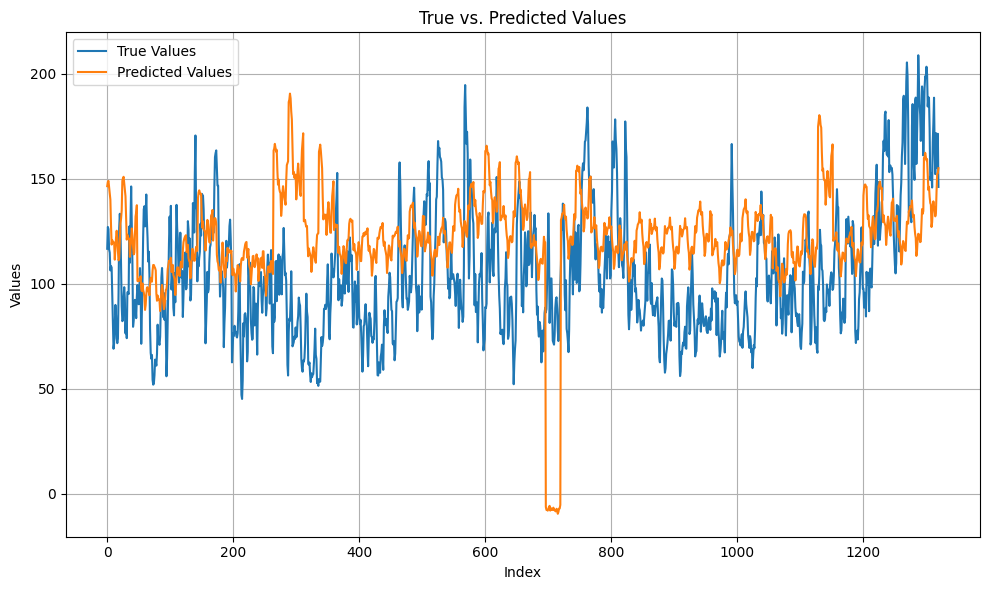

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Convert predictions to a NumPy array
predictions = all_predictions.ravel()
y_test = np.concatenate(all_y_test, axis=None)

# Generate a numerical index from 0 to len(y_train)-1
index = np.arange(len(y_test))

# Plot the true values against the numerical index
ax.plot(index, y_test, label='True Values', linestyle='-')

# Plot the predicted values against the numerical index
ax.plot(index, predictions, label='Predicted Values', linestyle='-')

# Add labels and legend
ax.set_title('True vs. Predicted Values')
ax.set_xlabel('Index')
ax.set_ylabel('Values')
ax.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Model


In [117]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from torch.optim.lr_scheduler import StepLR
from torch.nn.utils import clip_grad_norm_

In [118]:
# Extract features and labels
labels = df_encoded['MWh'].values
features = df_encoded.drop(['MWh'], axis=1).values

In [119]:
# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [120]:
# Define sequence length (number of time steps for LSTM)
sequence_length = 7*24  # Use the previous 7 days as input, 24 measurements

In [121]:
# Create sequences and labels for training
X, y = [], []
for i in range(len(features) - sequence_length):
    X.append(features[i:i+sequence_length])
    y.append(labels[i+sequence_length])

X, y = np.array(X), np.array(y)

In [122]:
# Split data into training and testing sets
split_ratio = 0.8  # Adjust as needed
split_index = int(split_ratio * len(X))


X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [123]:

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [124]:
# Create DataLoader for training and testing
batch_size = 32  # Adjust as needed
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [125]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Get the output from the last time step
        return out

In [126]:
class BidirectionalLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.2):
        super(BidirectionalLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # Double hidden_size due to bidirectional LSTM

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Get the output from the last time step
        return out

In [127]:
input_size = X_train.shape[2]  # Number of features
hidden_size = 64  # Adjust as needed
num_layers = 14  # Adjust as needed
output_size = 1  # Adjust for regression tasks

In [128]:


model = BidirectionalLSTMModel(input_size, hidden_size, num_layers, output_size)

# Define loss function and optimizer
criterion = nn.L1Loss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adjust learning rate as needed

scheduler = StepLR(optimizer, step_size=5, gamma=0.5)




In [129]:
# Define the device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Move the model to the GPU
model.to(device)

# Move data to GPU
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [ ]:
model.to(device)
model.train()
num_epochs = 50  # Adjust as needed
# Define the maximum gradient norm threshold
max_grad_norm = 1.0  # Adjust as needed

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to the same device as the model
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        
        # Clip gradients to prevent exploding gradients
        clip_grad_norm_(model.parameters(), max_grad_norm)
        
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    scheduler.step()



Epoch [1/50], Loss: 24.3428
Epoch [2/50], Loss: 24.0247
Epoch [3/50], Loss: 24.4381
Epoch [4/50], Loss: 24.2555
Epoch [5/50], Loss: 24.3261
Epoch [6/50], Loss: 40.2525
Epoch [7/50], Loss: 40.2797
Epoch [8/50], Loss: 40.3034
Epoch [9/50], Loss: 40.3252
Epoch [10/50], Loss: 40.3384
Epoch [11/50], Loss: 43.5339
Epoch [12/50], Loss: 43.6188
Epoch [13/50], Loss: 43.6004
Epoch [14/50], Loss: 43.5823
Epoch [15/50], Loss: 43.5643
Epoch [16/50], Loss: 43.4839
Epoch [17/50], Loss: 43.5369
Epoch [18/50], Loss: 43.5453
Epoch [19/50], Loss: 43.5536
Epoch [20/50], Loss: 43.5620
Epoch [21/50], Loss: 43.0376
Epoch [22/50], Loss: 42.8989
Epoch [23/50], Loss: 42.8433
Epoch [24/50], Loss: 42.8299
Epoch [25/50], Loss: 42.8573
Epoch [26/50], Loss: 42.7745
Epoch [27/50], Loss: 42.7420
Epoch [28/50], Loss: 42.7095
Epoch [29/50], Loss: 42.7104
Epoch [30/50], Loss: 42.7114
Epoch [31/50], Loss: 42.7140
Epoch [32/50], Loss: 42.7311
Epoch [33/50], Loss: 42.7482
Epoch [34/50], Loss: 42.7550


In [ ]:

# Rolling window evaluation
model.eval()
predictions = []

for i in range(len(X_test)):
    if i < sequence_length:
        # Initial predictions using the training data
        predictions.append(y_train[i].item())
    else:
        inputs = X_test[i].unsqueeze(0)
        with torch.no_grad():
            output = model(inputs)
        predictions.append(output.item())


        

In [ ]:
# Calculate and print evaluation metrics (e.g., MAE, MSE, etc.)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Move the predictions tensor from GPU to CPU
predictions = np.array(predictions)
y_test_cpu = y_test.cpu().numpy()

mae = mean_absolute_error(y_test_cpu, predictions)
mse = mean_squared_error(y_test_cpu, predictions)
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Convert predictions to a NumPy array
predictions = predictions
y_test = y_test.cpu().numpy()

# Generate a numerical index from 0 to len(y_train)-1
index = np.arange(len(y_test))

# Plot the true values against the numerical index
ax.plot(index, y_test, label='True Values', marker='o', linestyle='-')

# Plot the predicted values against the numerical index
ax.plot(index, predictions, label='Predicted Values', marker='x', linestyle='-')

# Add labels and legend
ax.set_title('True vs. Predicted Values')
ax.set_xlabel('Index')
ax.set_ylabel('Values')
ax.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
len(y_test)